<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/SampleProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [61]:
#from bioinfokit.visuz import cluster

## **Upload File**

In [185]:
!pip install pycaret


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/eb/43/ec8d59a663e0a1a67196b404ec38ccb0051708bad74a48c80d96c61dd0e5/pycaret-3.2.0-py3-none-any.whl.metadata
  Using cached pycaret-3.2.0-py3-none-any.whl.metadata (17 kB)
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Obtaining dependency information for lightgbm>=3.0.0 from https://files.pythonhosted.org/packages/b8/9d/1ce80cee7c5ef60f2fcc7e9fa97f29f7a8de3dc5a08922b3b2f1e9106481/lightgbm-4.1.0-py3-none-manylinux_2_28_x86_64.whl.metadata
  Using cached lightgbm-4.1.0-py3-none-manylinux_2_28_x86_64.whl.metadata (19 kB)
  Us

In [192]:
# from google.colab import files
# uploaded = files.upload()

NameError: name 'files' is not defined

In [64]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/ZaraJ2023/Concordia-INSE6220-F2023/main/Raisin_Dataset01.csv')
df.head(n=25)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   87524       442.246011       253.291155      0.819738       90546   
1   75166       406.690687       243.032436      0.801805       78789   
2   90856       442.267048       266.328318      0.798354       93717   
3   45928       286.540559       208.760042      0.684989       47336   
4   79408       352.190770       290.827533      0.564011       81463   
5   49242       318.125407       200.122120      0.777351       51368   
6   42492       310.146072       176.131449      0.823099       43904   
7   60952       332.455472       235.429835      0.706058       62329   
8   42256       323.189607       172.575926      0.845499       44743   
9   64380       366.964842       227.771615      0.784056       66125   
10  80437       449.454581       232.325506      0.856043       84460   
11  43725       301.322218       186.950629      0.784258       45021   
12  43441       276.610829       201.813135      0.683882       45133   
13  76792       338.857545       291.359202      0.510584       78842   
14  74167       387.798931       247.858123      0.769090       76807   
15  33565       261.554331       167.708491      0.767374       35794   
16  64670       403.083975       206.484644      0.858829       66419   
17  64762       354.293940       235.752463      0.746474       66713   
18  43295       304.284467       182.811037      0.799407       44714   
19  70699       418.698572       216.596054      0.855799       72363   
20  69726       354.176912       252.529208      0.701161       71849   
21  57346       330.478438       222.443748      0.739555       59365   
22  82028       397.114976       268.333773      0.737169       84427   
23  61251       301.507790       273.659941      0.419754       64732   
24  96277       447.134523       275.216154      0.788128       97865   

      Extent  Perimeter  class  
0   0.758651   1184.040      0  
1   0.684130   1121.786      0  
2   0.637613   1208.575      0  
3   0.699599    844.162      0  
4   0.792772   1073.251      0  
5   0.658456    881.836      0  
6   0.665894    823.796      0  
7   0.743598    933.366      0  
8   0.698031    849.728      0  
9   0.664376    981.544      0  
10  0.674236   1176.305      0  
11  0.697068    818.873      0  
12  0.690856    803.748      0  
13  0.772322   1042.770      0  
14  0.680182   1084.729      0  
15  0.681551    751.413      0  
16  0.756773   1028.445      0  
17  0.694998    981.509      0  
18  0.713838    814.680      0  
19  0.728075   1061.321      0  
20  0.734399   1035.501      0  
21  0.723609    928.272      0  
22  0.686375   1106.355      0  
23  0.643596    971.769      0  
24  0.704057   1181.921      0

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


### **Classes**

In [67]:
y = df['class']
target = df['class'].to_numpy()
print("Number of duplicated rows is: ", df.duplicated().sum())

print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())


Number of duplicated rows is:  0
Number of rows with NaNs is:  0


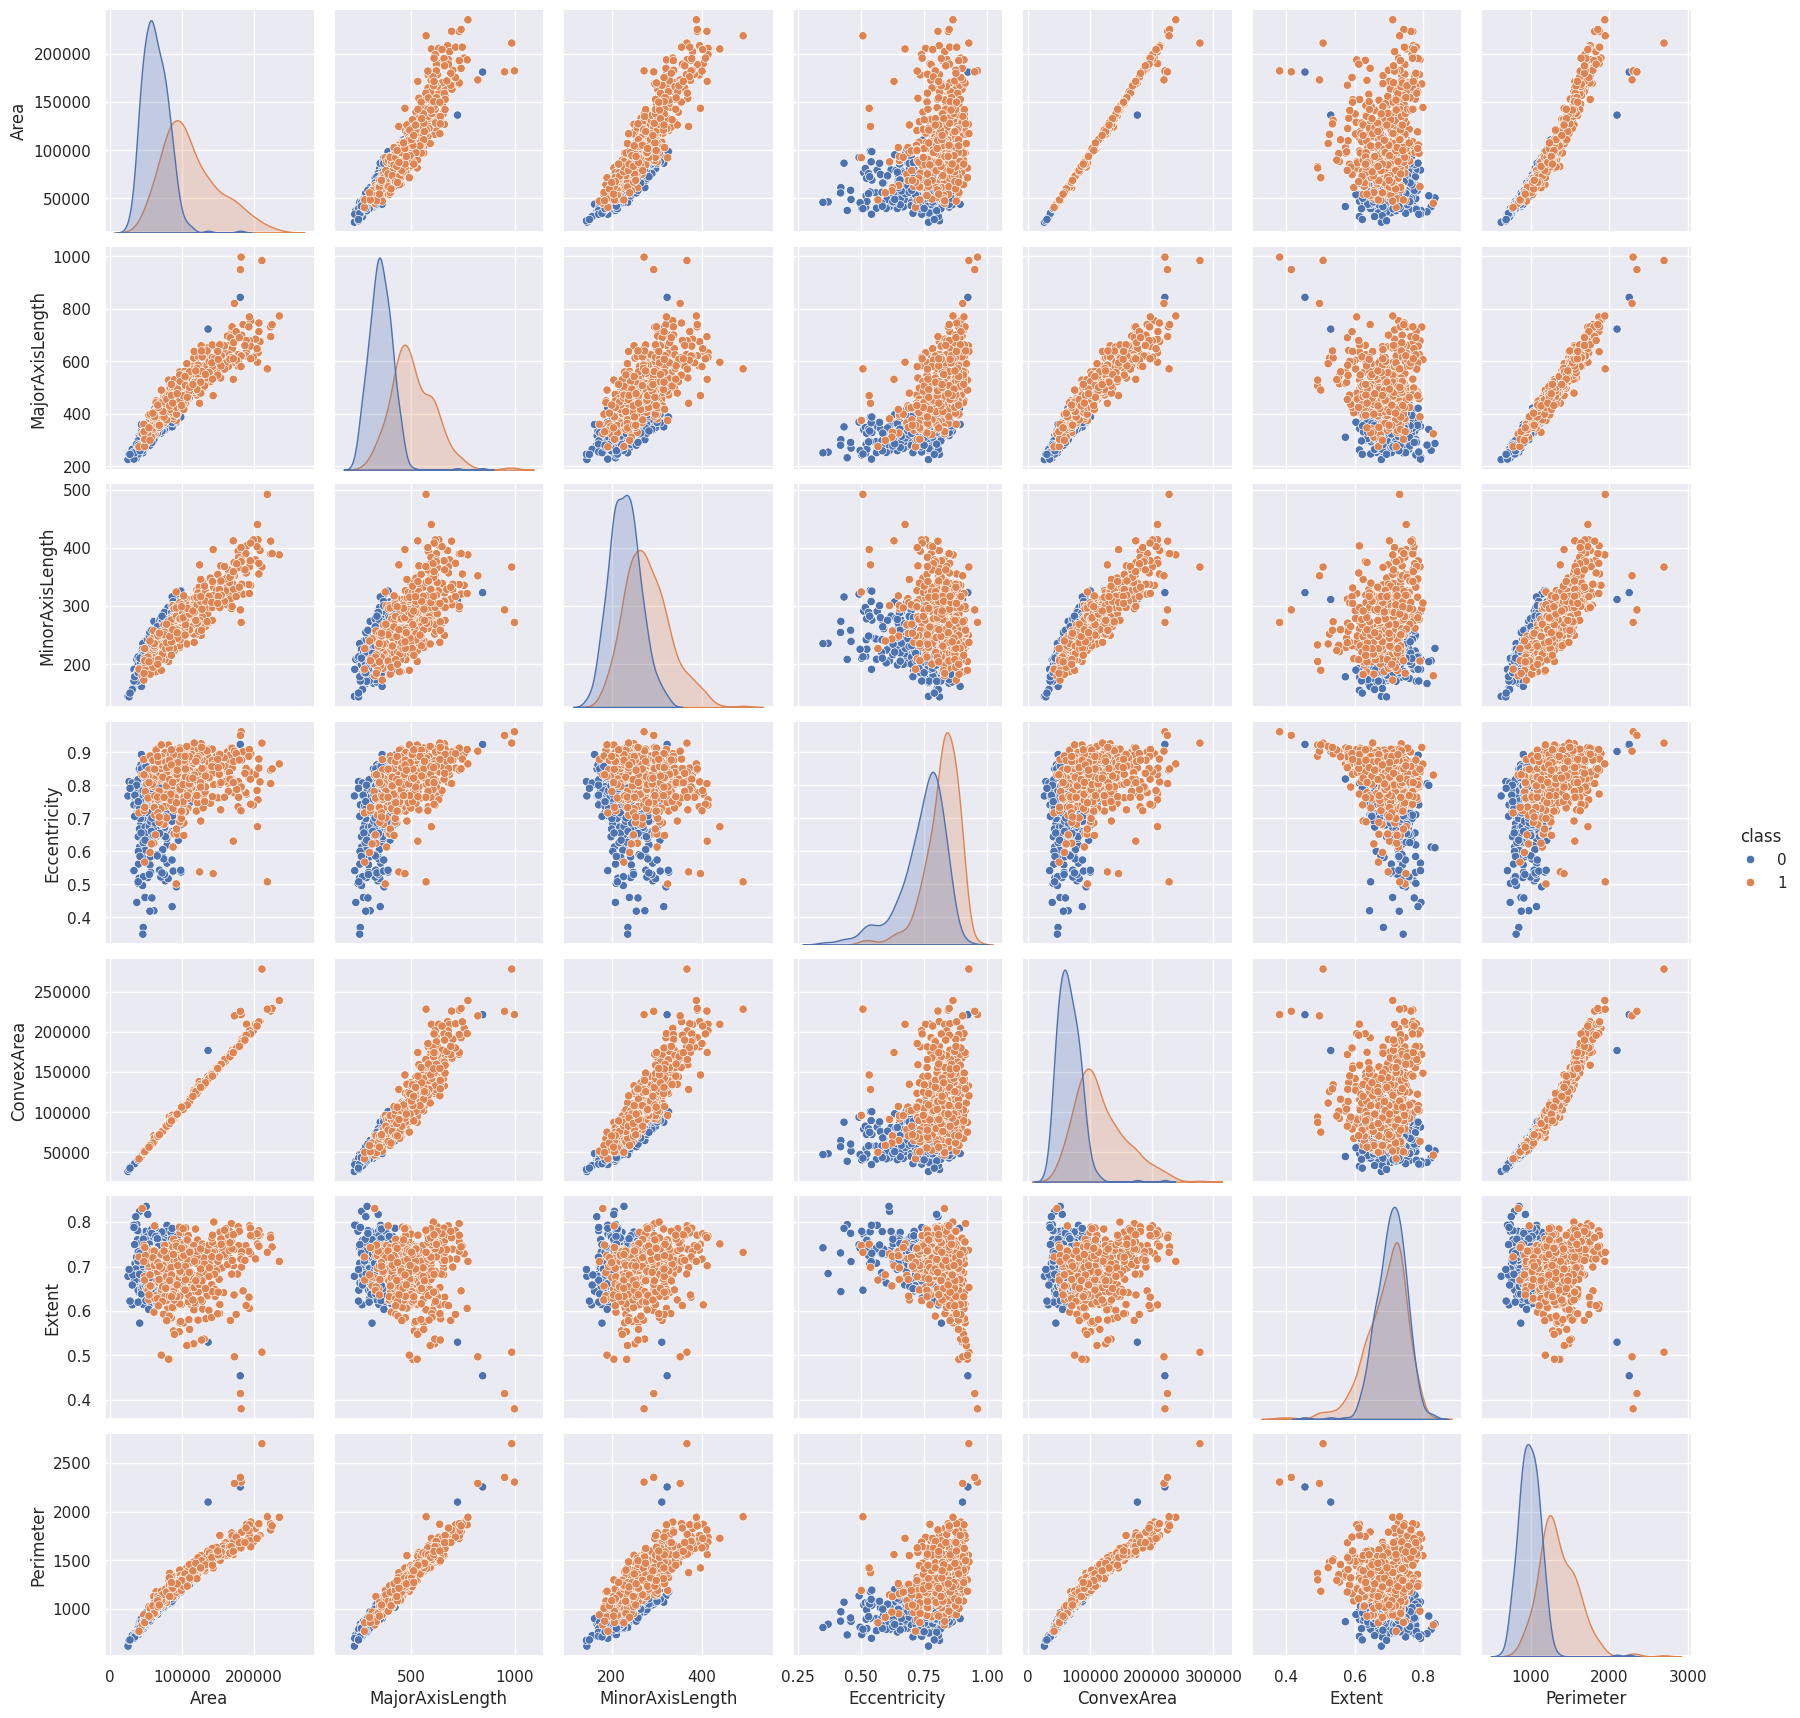

In [68]:
sns.pairplot(df, hue='class')
plt.show()

### **Features**

Data Matrix

In [70]:
X = df.iloc[:,0:7]
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   
5  49242       318.125407       200.122120      0.777351       51368   
6  42492       310.146072       176.131449      0.823099       43904   
7  60952       332.455472       235.429835      0.706058       62329   
8  42256       323.189607       172.575926      0.845499       44743   
9  64380       366.964842       227.771615      0.784056       66125   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  
5  0.658456    881.836  
6  0.665894    823.796  
7  0.743598    933.366  
8  0.698031    849.728  
9  0.664376    981.544

In [71]:
X.describe().transpose()

count          mean           std           min  \
Area             900.0  87804.127778  39002.111390  25387.000000   
MajorAxisLength  900.0    430.929950    116.035121    225.629541   
MinorAxisLength  900.0    254.488133     49.988902    143.710872   
Eccentricity     900.0      0.781542      0.090318      0.348730   
ConvexArea       900.0  91186.090000  40769.290132  26139.000000   
Extent           900.0      0.699508      0.053468      0.379856   
Perimeter        900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Area             59348.000000  78902.000000  105028.250000  235047.000000  
MajorAxisLength    345.442898    407.803951     494.187014     997.291941  
MinorAxisLength    219.111126    247.848409     279.888575     492.275279  
Eccentricity         0.741766      0.798846       0.842571       0.962124  
ConvexArea       61513.250000  81651.000000  108375.750000  278217.000000  
Extent               0.670869      0.707367       0.734991       0.835455  
Perimeter          966.410750   1119.509000    1308.389750    2697.753000

Notice that the data is not standardizd. So we need to standarize it.

In [73]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [74]:
df.describe().transpose()

count          mean       std       min       25%       50%  \
Area             900.0  1.894781e-16  1.000556 -1.601242 -0.730010 -0.228374   
MajorAxisLength  900.0  0.000000e+00  1.000556 -1.770279 -0.737144 -0.199413   
MinorAxisLength  900.0 -8.210716e-16  1.000556 -2.217269 -0.708091 -0.132898   
Eccentricity     900.0  6.947529e-16  1.000556 -4.794739 -0.440641  0.191694   
ConvexArea       900.0  6.315935e-17  1.000556 -1.596379 -0.728228 -0.234009   
Extent           900.0  1.436875e-15  1.000556 -5.981678 -0.535921  0.147067   
Perimeter        900.0 -6.315935e-17  1.000556 -1.998568 -0.729119 -0.169574   

                      75%       max  
Area             0.441866  3.777353  
MajorAxisLength  0.545458  4.883667  
MinorAxisLength  0.508404  4.759444  
Eccentricity     0.676084  2.000508  
ConvexArea       0.421867  4.590095  
Extent           0.664006  2.543983  
Perimeter        0.520748  5.598604

Notice that the data is now standardizd.

**Observations and variables**

In [77]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

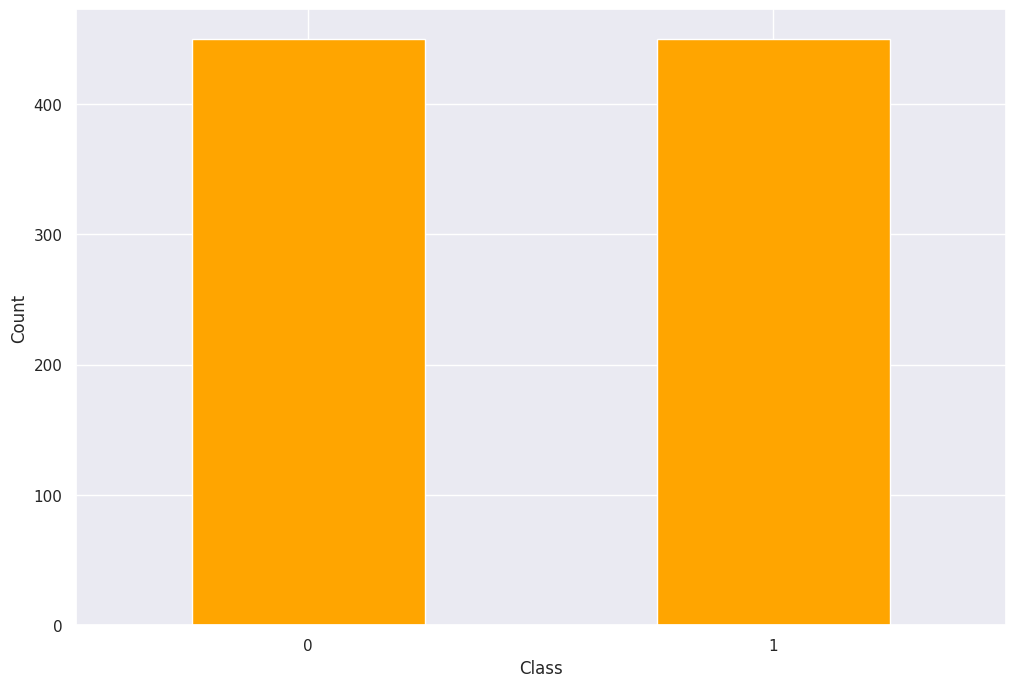

In [80]:
y.value_counts().plot(kind='bar', rot=0, color='orange')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

/tmp/ipykernel_1183/2970302236.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


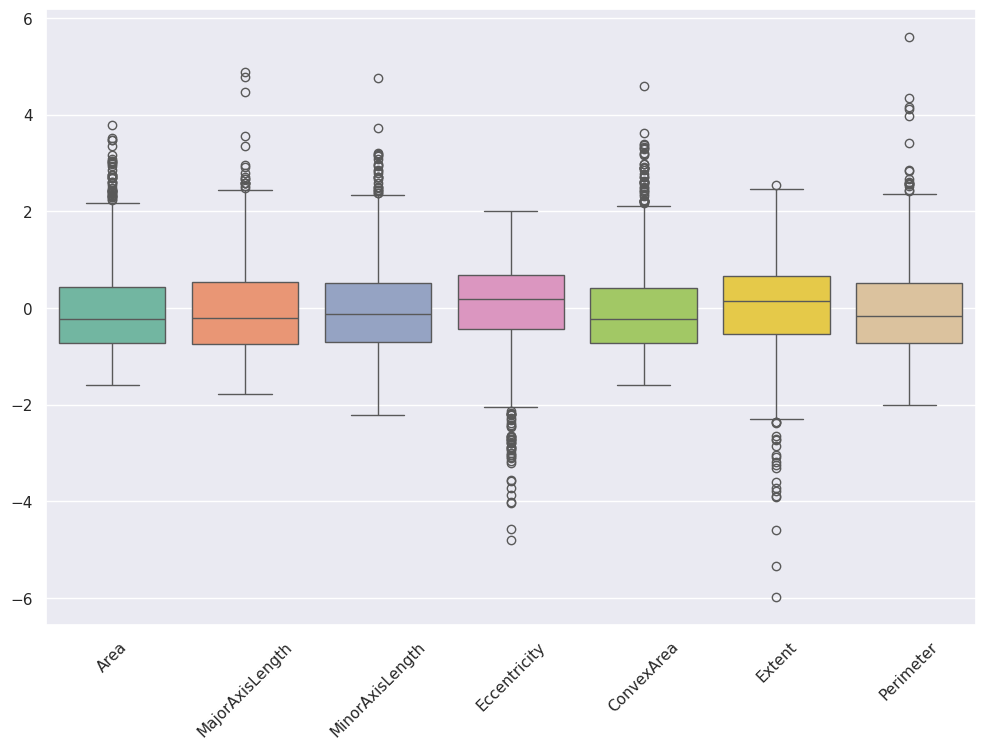

In [82]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/tmp/ipykernel_1183/1326563592.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


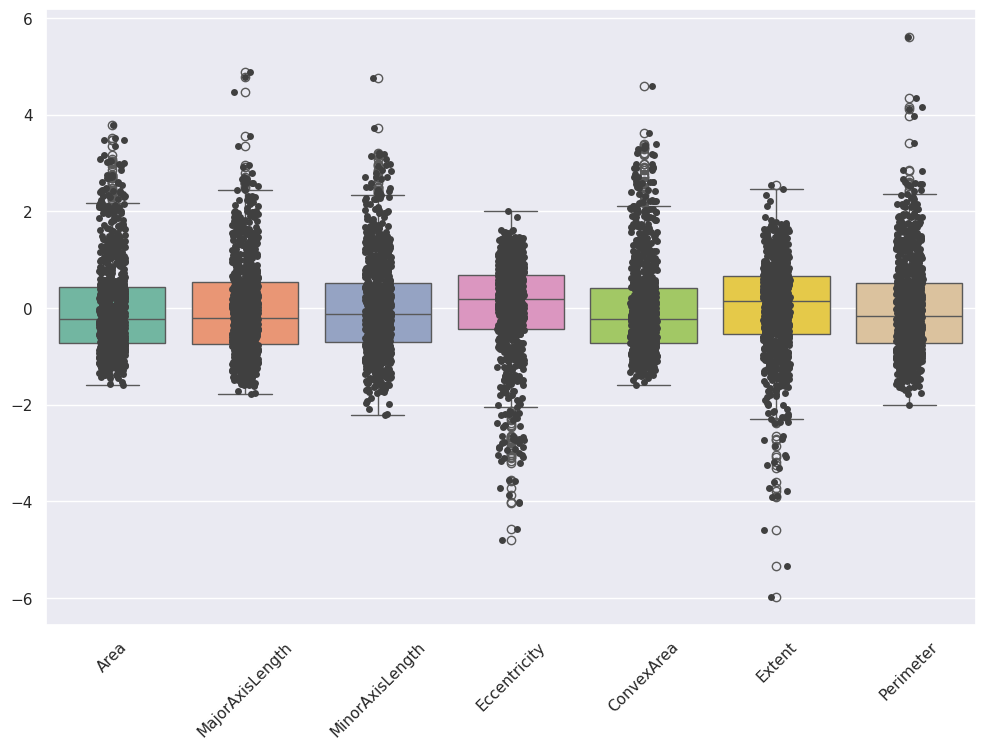

In [83]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [85]:
df.describe()


Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count  9.000000e+02       900.000000     9.000000e+02  9.000000e+02   
mean   1.894781e-16         0.000000    -8.210716e-16  6.947529e-16   
std    1.000556e+00         1.000556     1.000556e+00  1.000556e+00   
min   -1.601242e+00        -1.770279    -2.217269e+00 -4.794739e+00   
25%   -7.300105e-01        -0.737144    -7.080907e-01 -4.406412e-01   
50%   -2.283742e-01        -0.199413    -1.328978e-01  1.916942e-01   
75%    4.418658e-01         0.545458     5.084041e-01  6.760837e-01   
max    3.777353e+00         4.883667     4.759444e+00  2.000508e+00   

         ConvexArea        Extent     Perimeter  
count  9.000000e+02  9.000000e+02  9.000000e+02  
mean   6.315935e-17  1.436875e-15 -6.315935e-17  
std    1.000556e+00  1.000556e+00  1.000556e+00  
min   -1.596379e+00 -5.981678e+00 -1.998568e+00  
25%   -7.282280e-01 -5.359214e-01 -7.291192e-01  
50%   -2.340093e-01  1.470669e-01 -1.695745e-01  
75%    4.218670e-01  6.640063e-01  5.207484e-01  
max    4.590095e+00  2.543983e+00  5.598604e+00

### Pair Plot

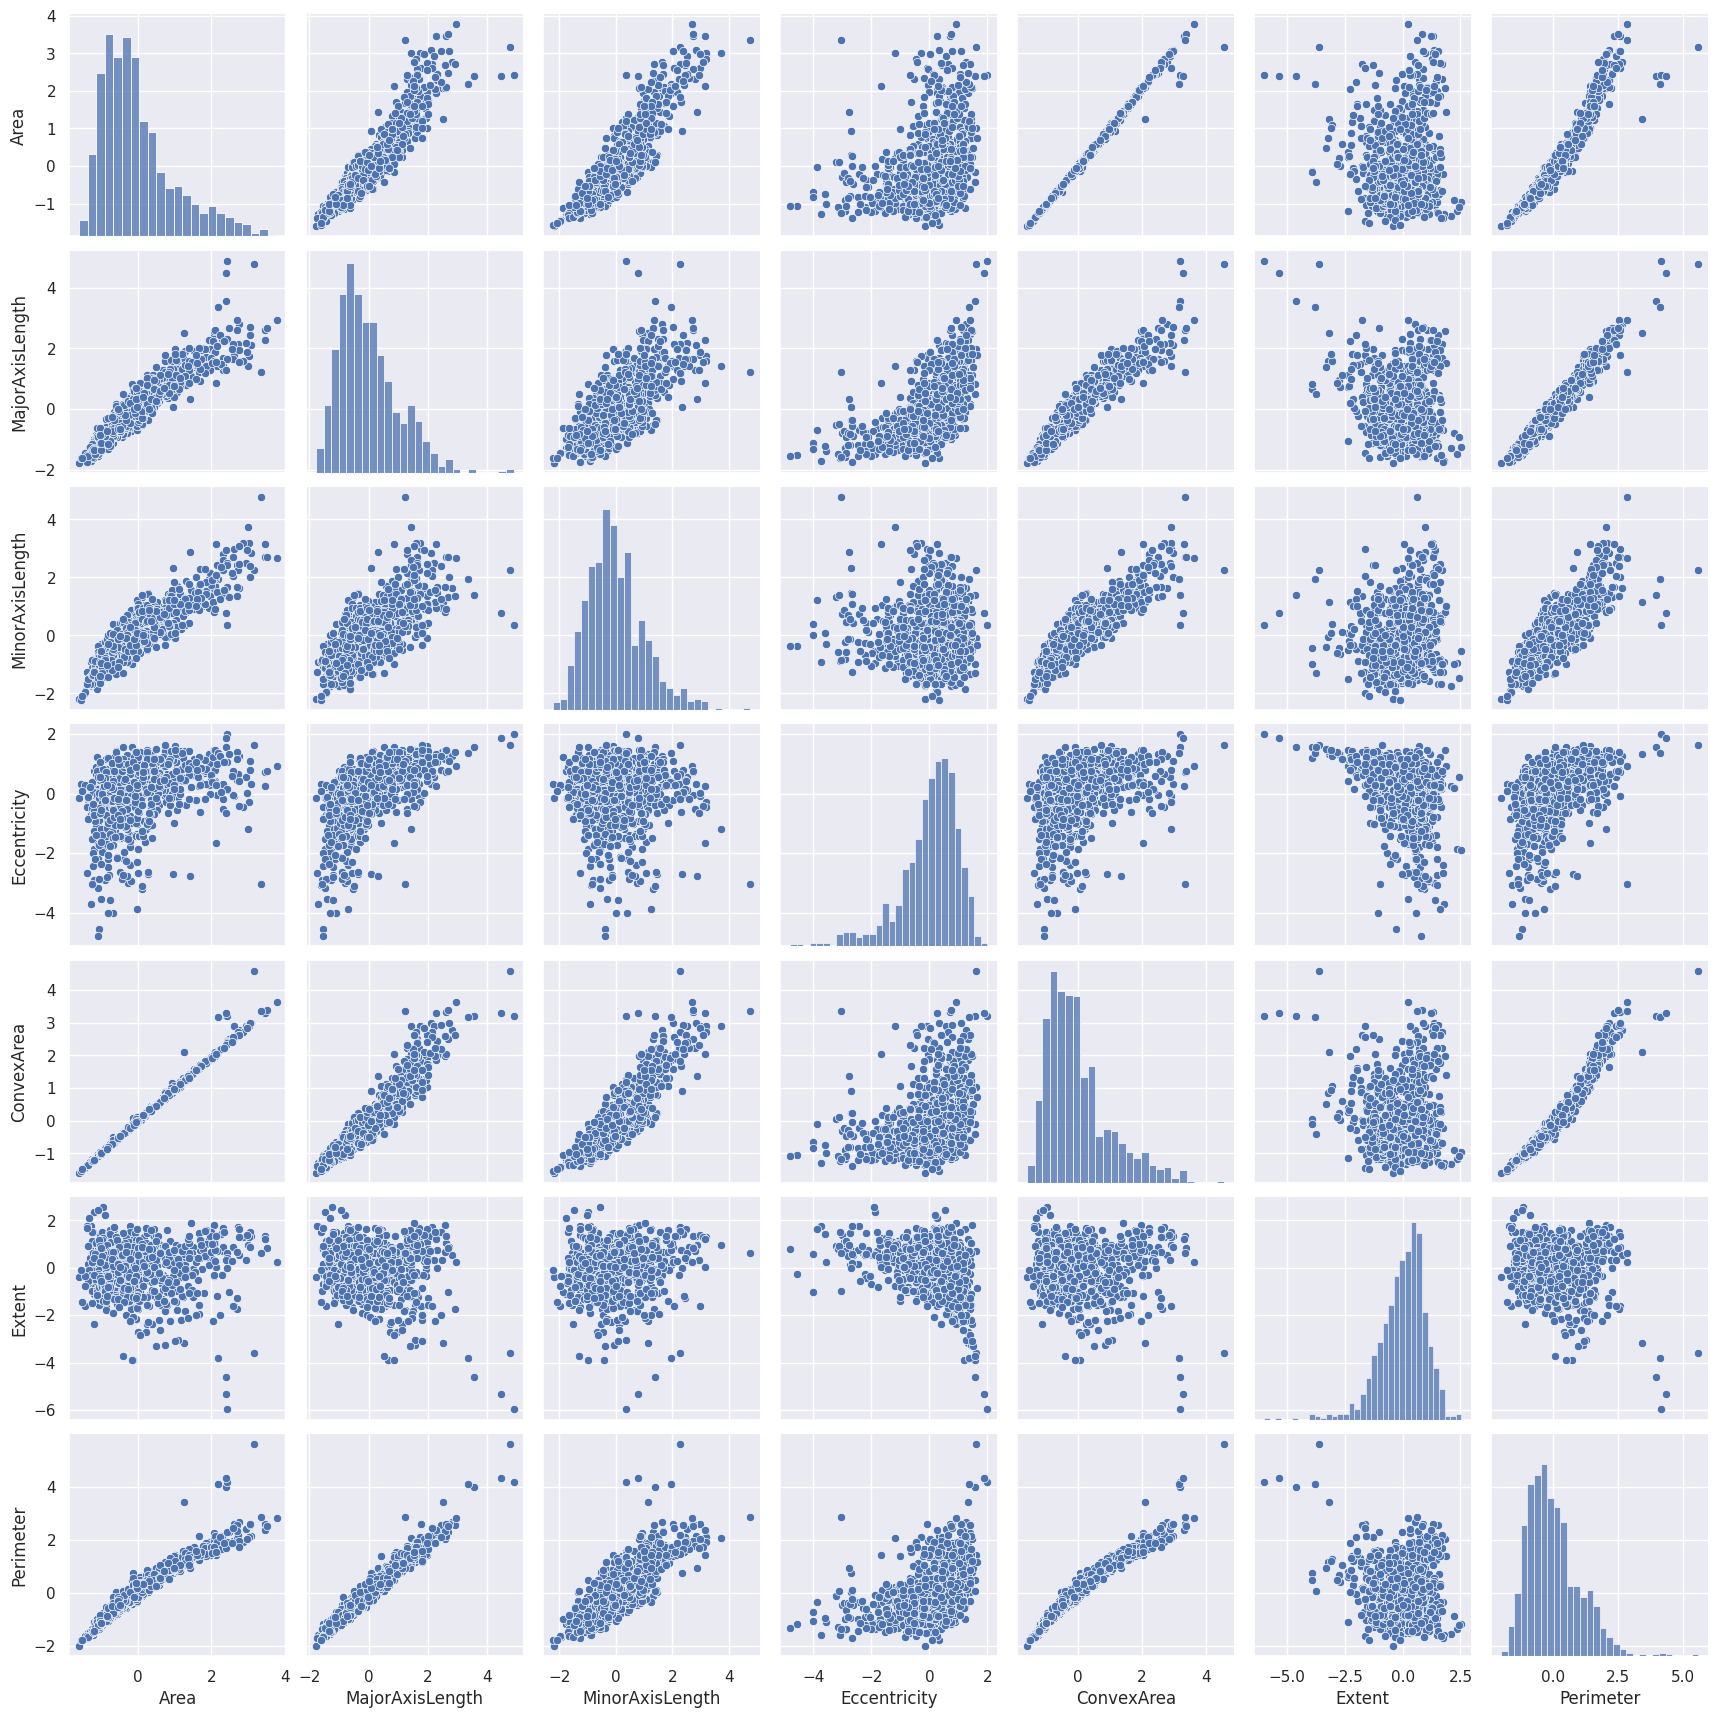

In [87]:
sns.pairplot(df)
plt.show()

## **Covariance**

Text(0.5, 1.0, 'Covariance matrix')

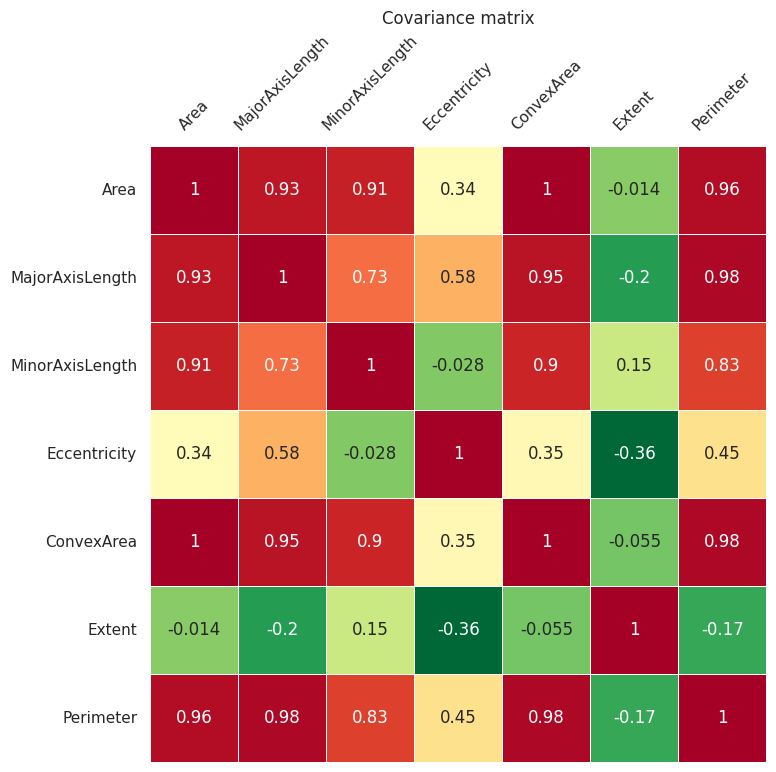

In [89]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

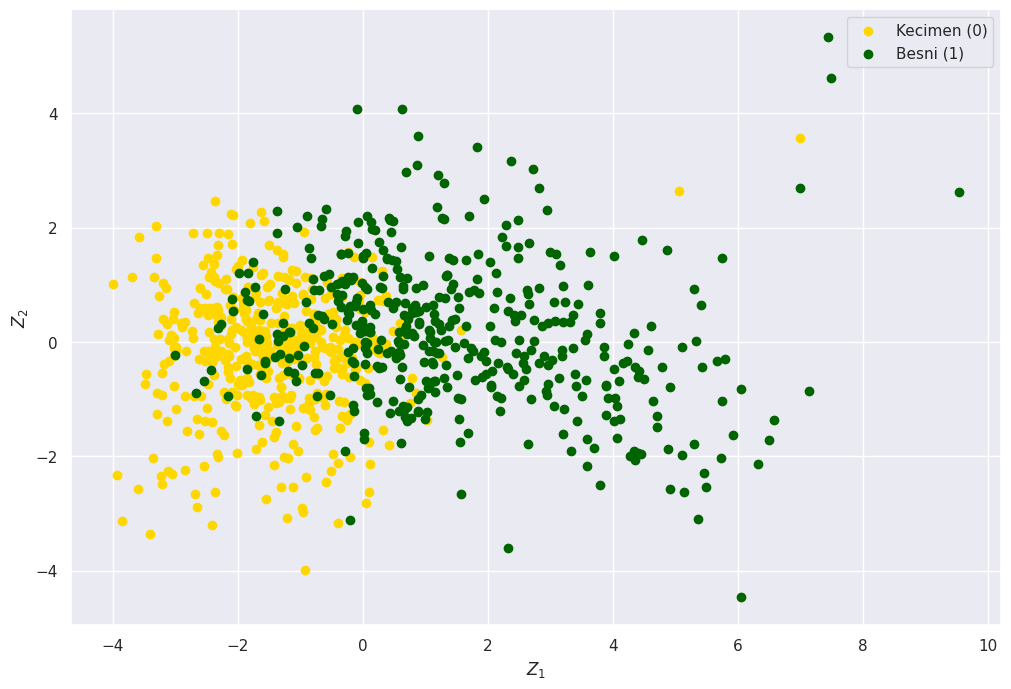

In [91]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Kecimen)->0,  2(Besni)->1
idx_Kecimen = np.where(y == 0)
idx_Besni = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='gold', label='Kecimen (0)')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='darkgreen', label='Besni (1)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

Eigenvector matrix:
[[ 0.44828422 -0.11609991  0.00548378 -0.11113906 -0.61104765 -0.09983439
  -0.62436686]
 [ 0.4432398   0.13658724 -0.10054797  0.49520464  0.08757032 -0.68557712
   0.22772863]
 [ 0.38938118 -0.37492246  0.23604354 -0.6558767   0.38457775 -0.2390332
   0.12995283]
 [ 0.20297098  0.61082321 -0.62852206 -0.42629865  0.07510412  0.05356014
   0.02044403]
 [ 0.45093833 -0.08761633  0.0366724   0.0558117  -0.39241075  0.47120104
   0.63914127]
 [-0.05636836 -0.66734439 -0.73198093  0.10905256  0.05685884  0.02345199
  -0.00161639]
 [ 0.45082374  0.03417227  0.04430077  0.3398651   0.5551508   0.48726906
  -0.36399975]]


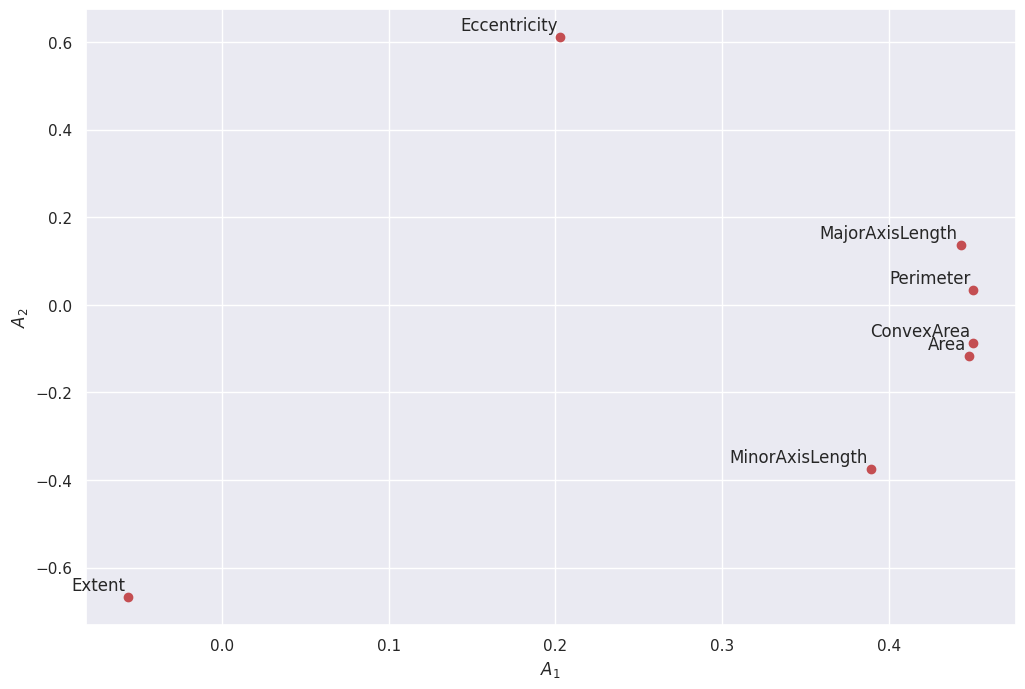

In [93]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/home/1ebe2662-52af-41a4-87fb-189feb5278ed/.local/lib/python3.11/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


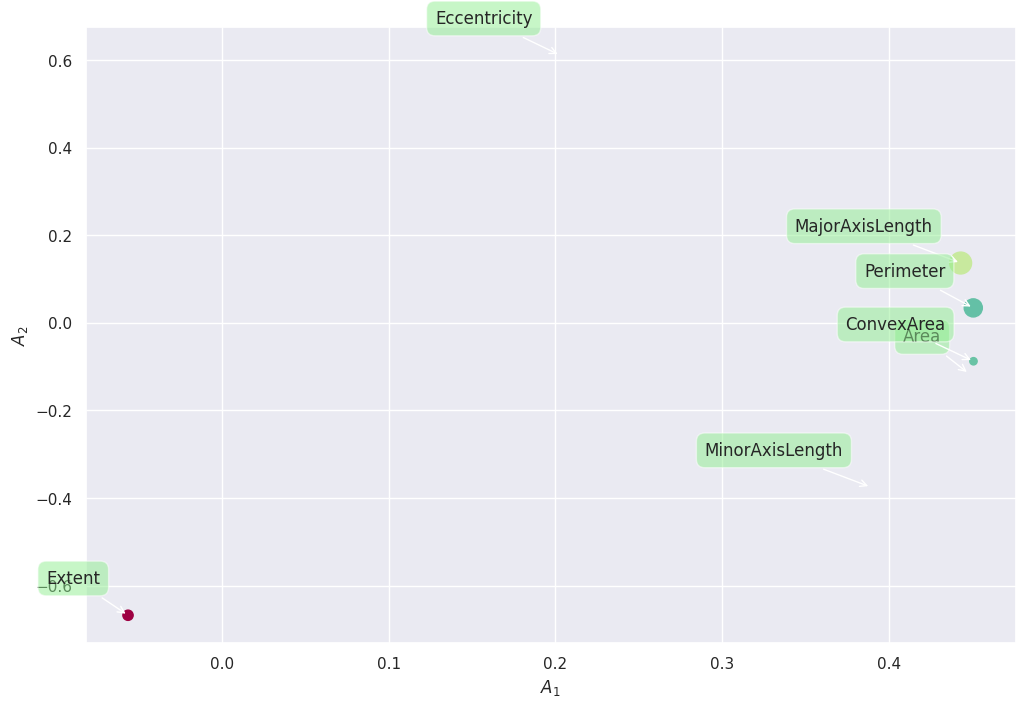

In [94]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

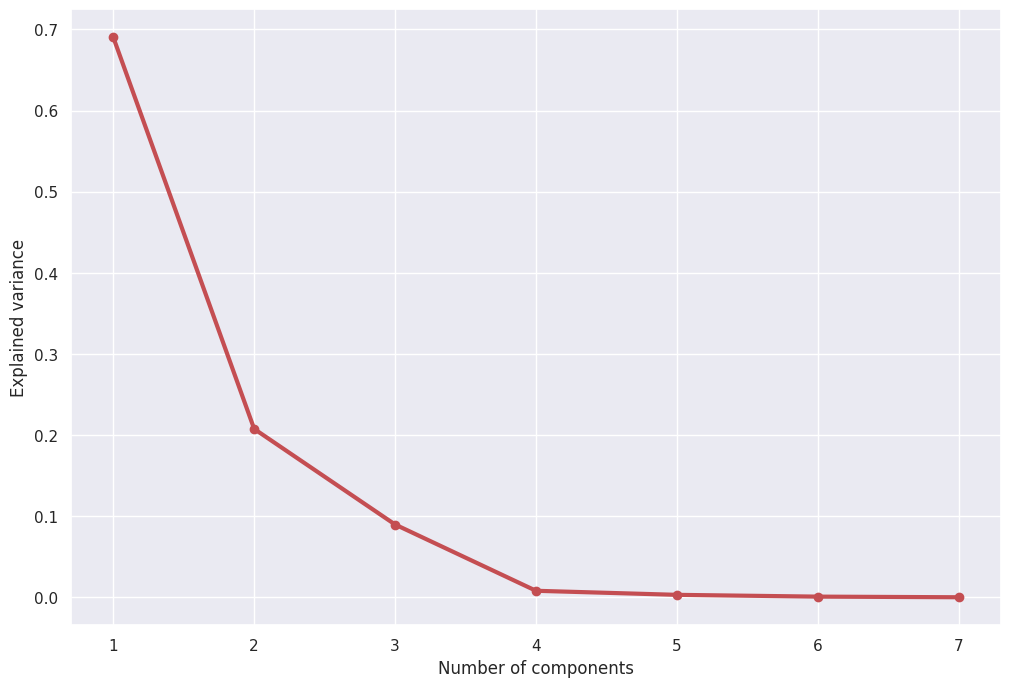

In [96]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

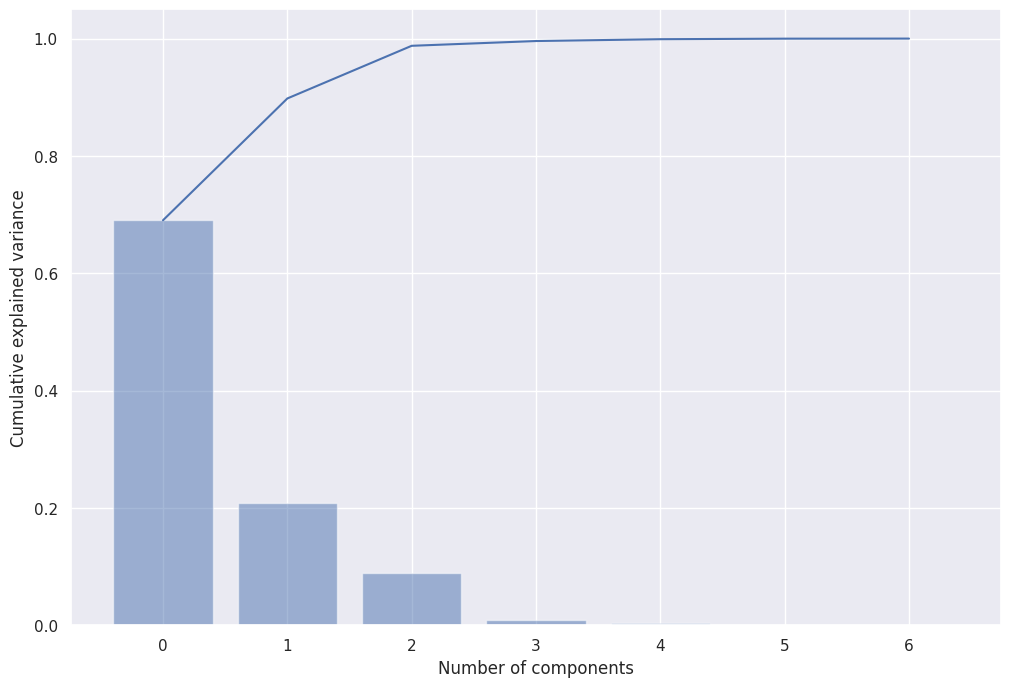

In [98]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [100]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (69.0%)',
 '1': 'PC 2 (20.8%)',
 '2': 'PC 3 (9.0%)',
 '3': 'PC 4 (0.8%)',
 '4': 'PC 5 (0.3%)',
 '5': 'PC 6 (0.1%)',
 '6': 'PC 7 (0.0%)'}

### **Biplot**

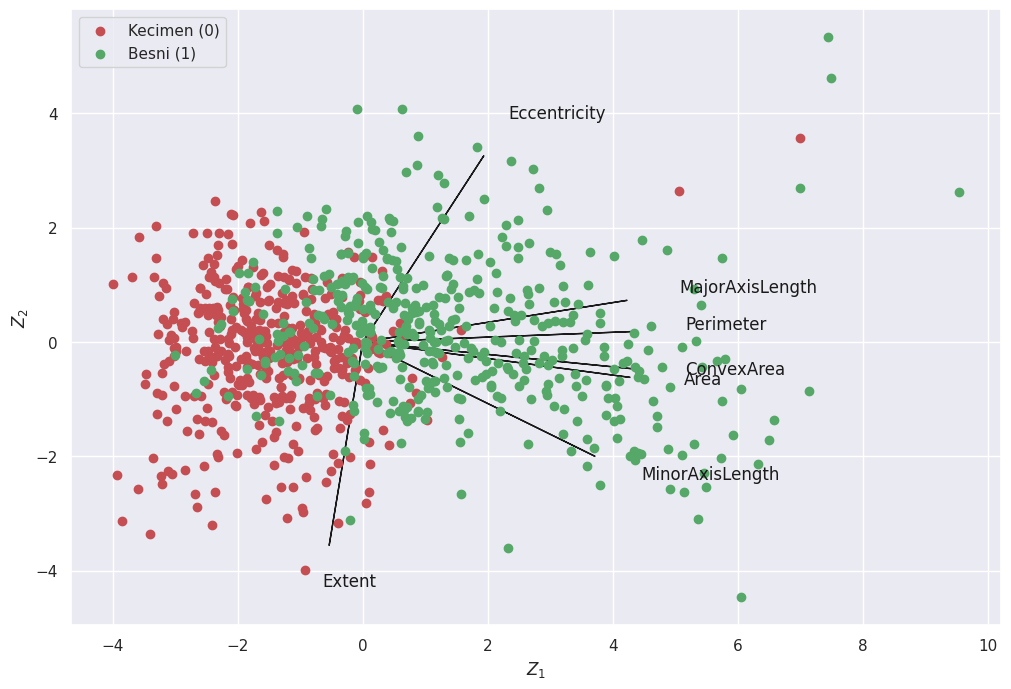

In [131]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='r', label='Kecimen (0)')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='g', label='Besni (1)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [133]:
# cluster.biplot(cscore=Z, loadings=A, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), 
               # var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=target)

**Using PCA Librarry**

In [135]:
!pip install pca

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [136]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [139]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC          feature   loading  type
0  PC1       ConvexArea  0.450938  best
1  PC2           Extent -0.667344  best
2  PC3           Extent -0.731981  best
3  PC1             Area  0.448284  weak
4  PC1  MajorAxisLength  0.443240  weak
5  PC1  MinorAxisLength  0.389381  weak
6  PC3     Eccentricity -0.628522  weak
7  PC1        Perimeter  0.450824  weak


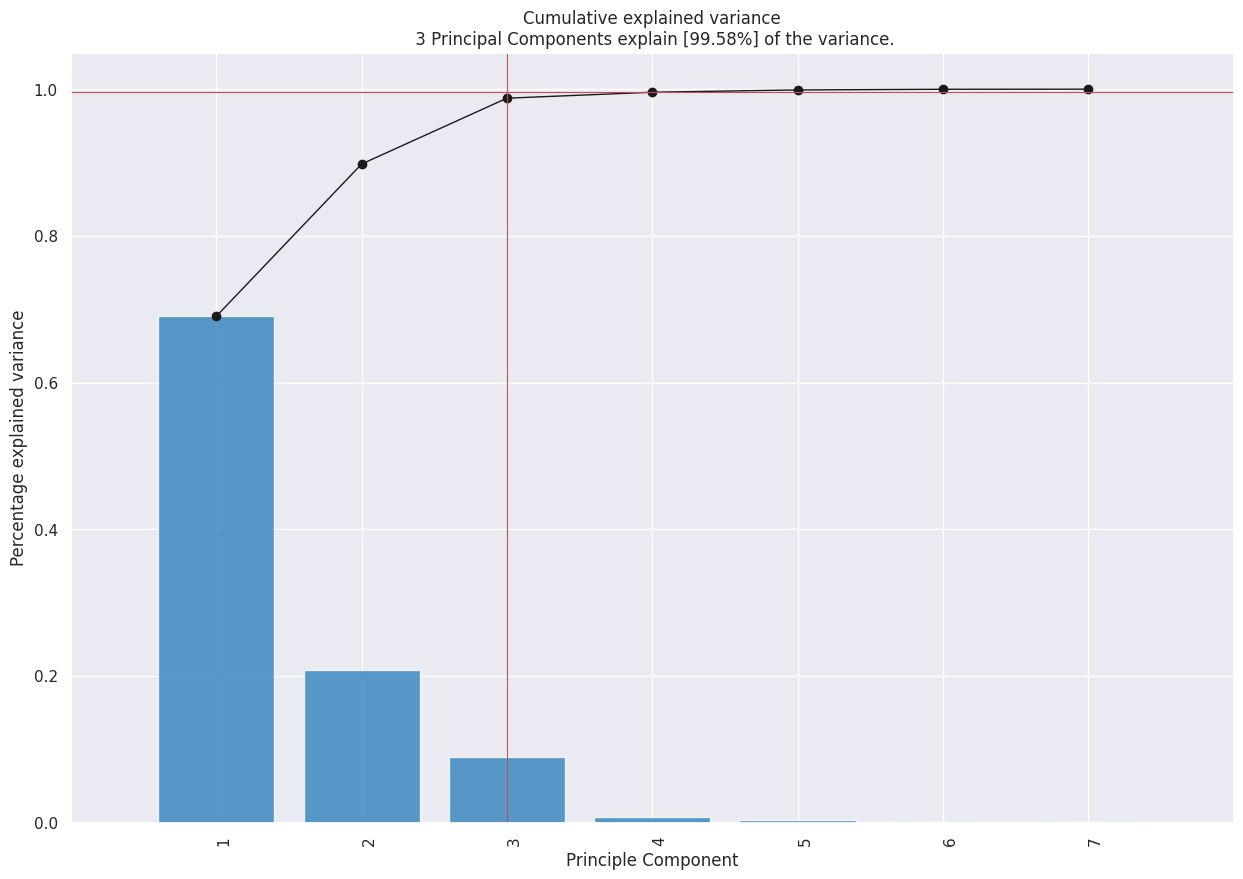

In [141]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

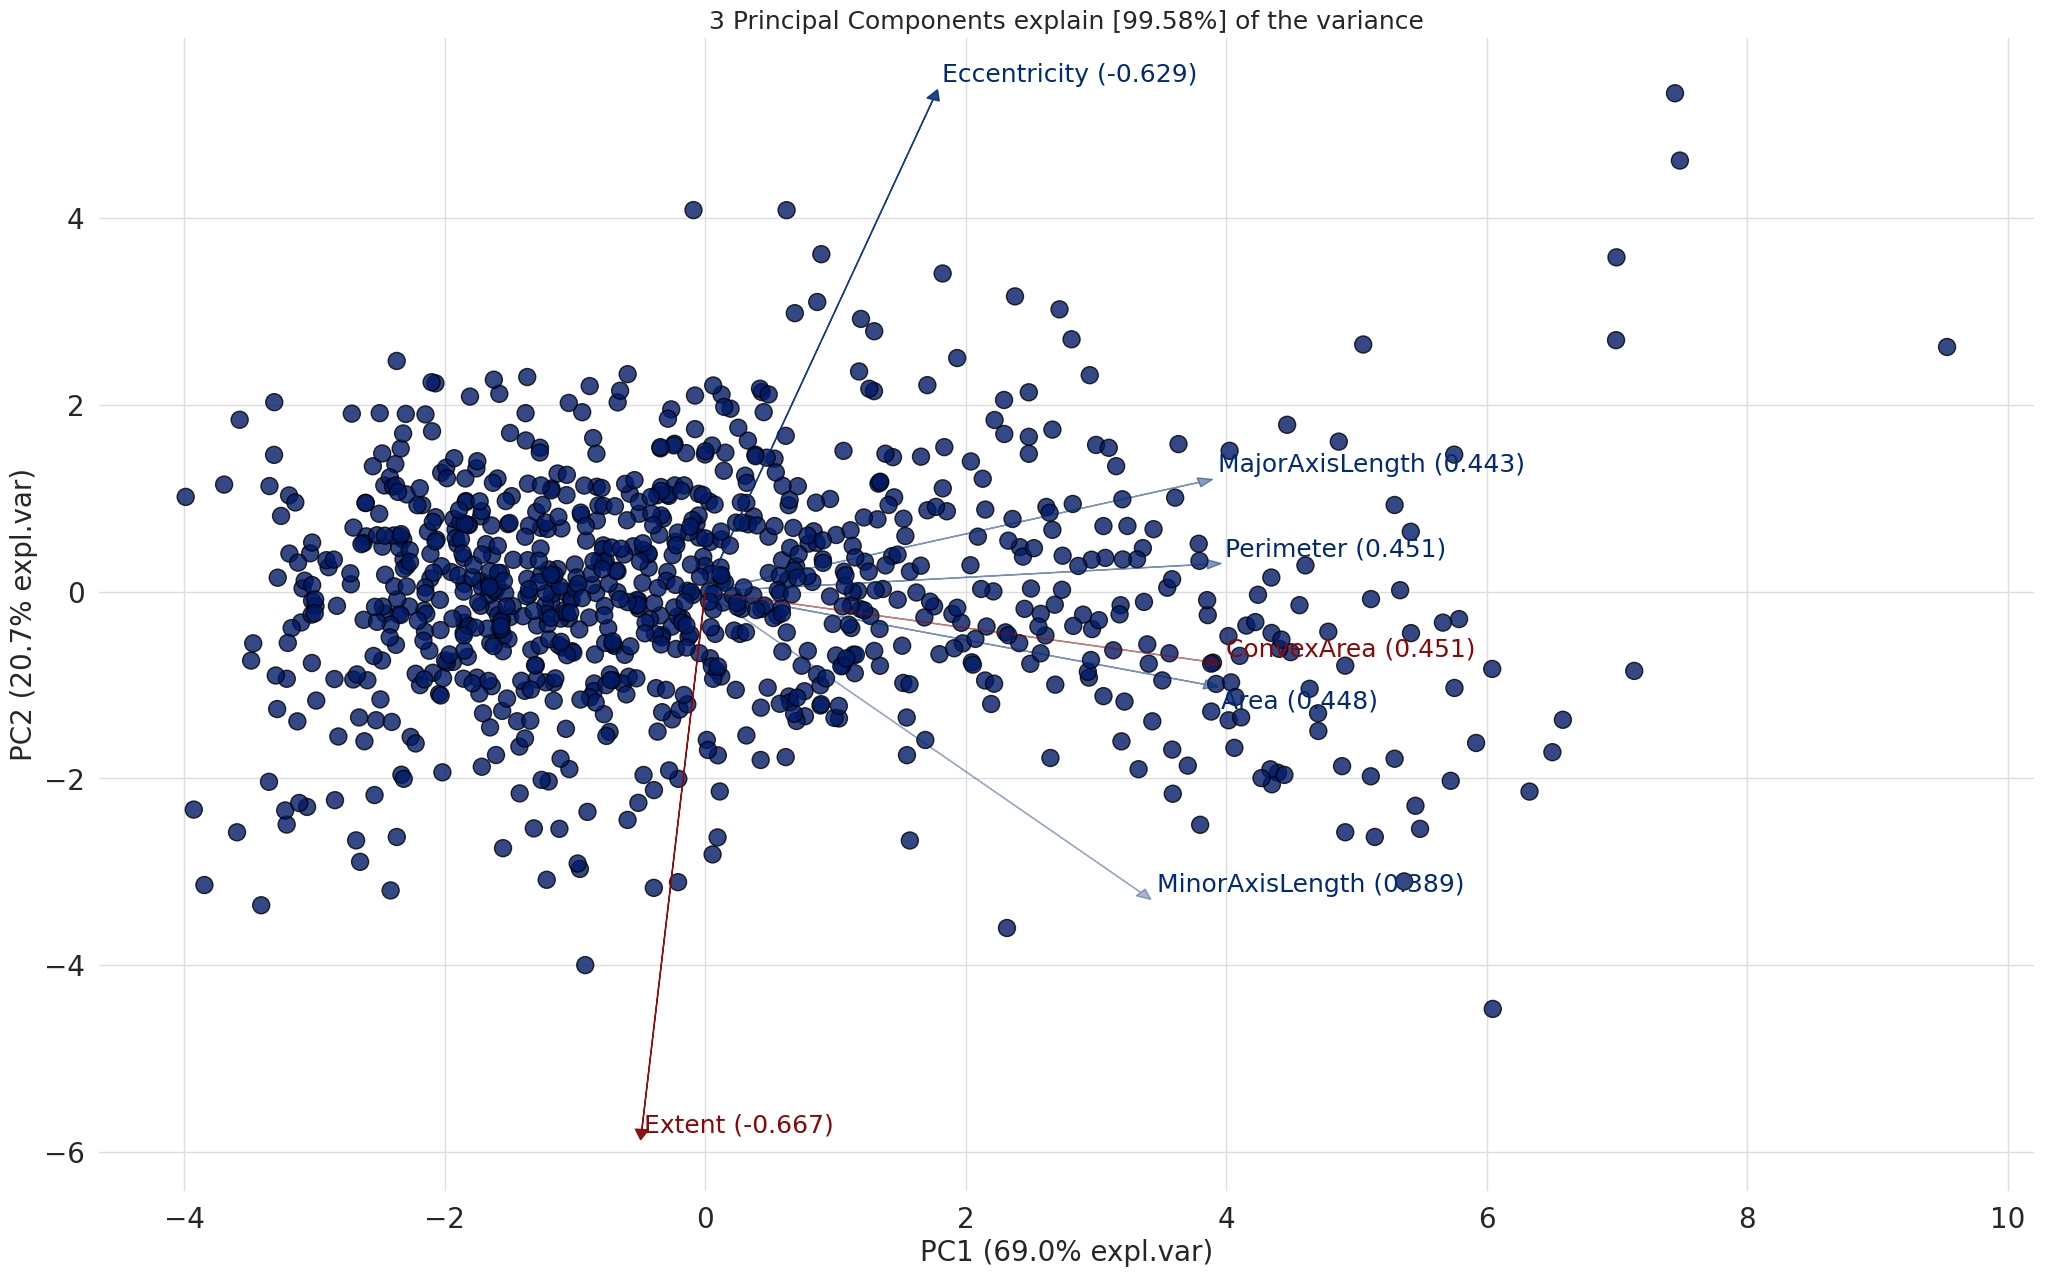

In [143]:
model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

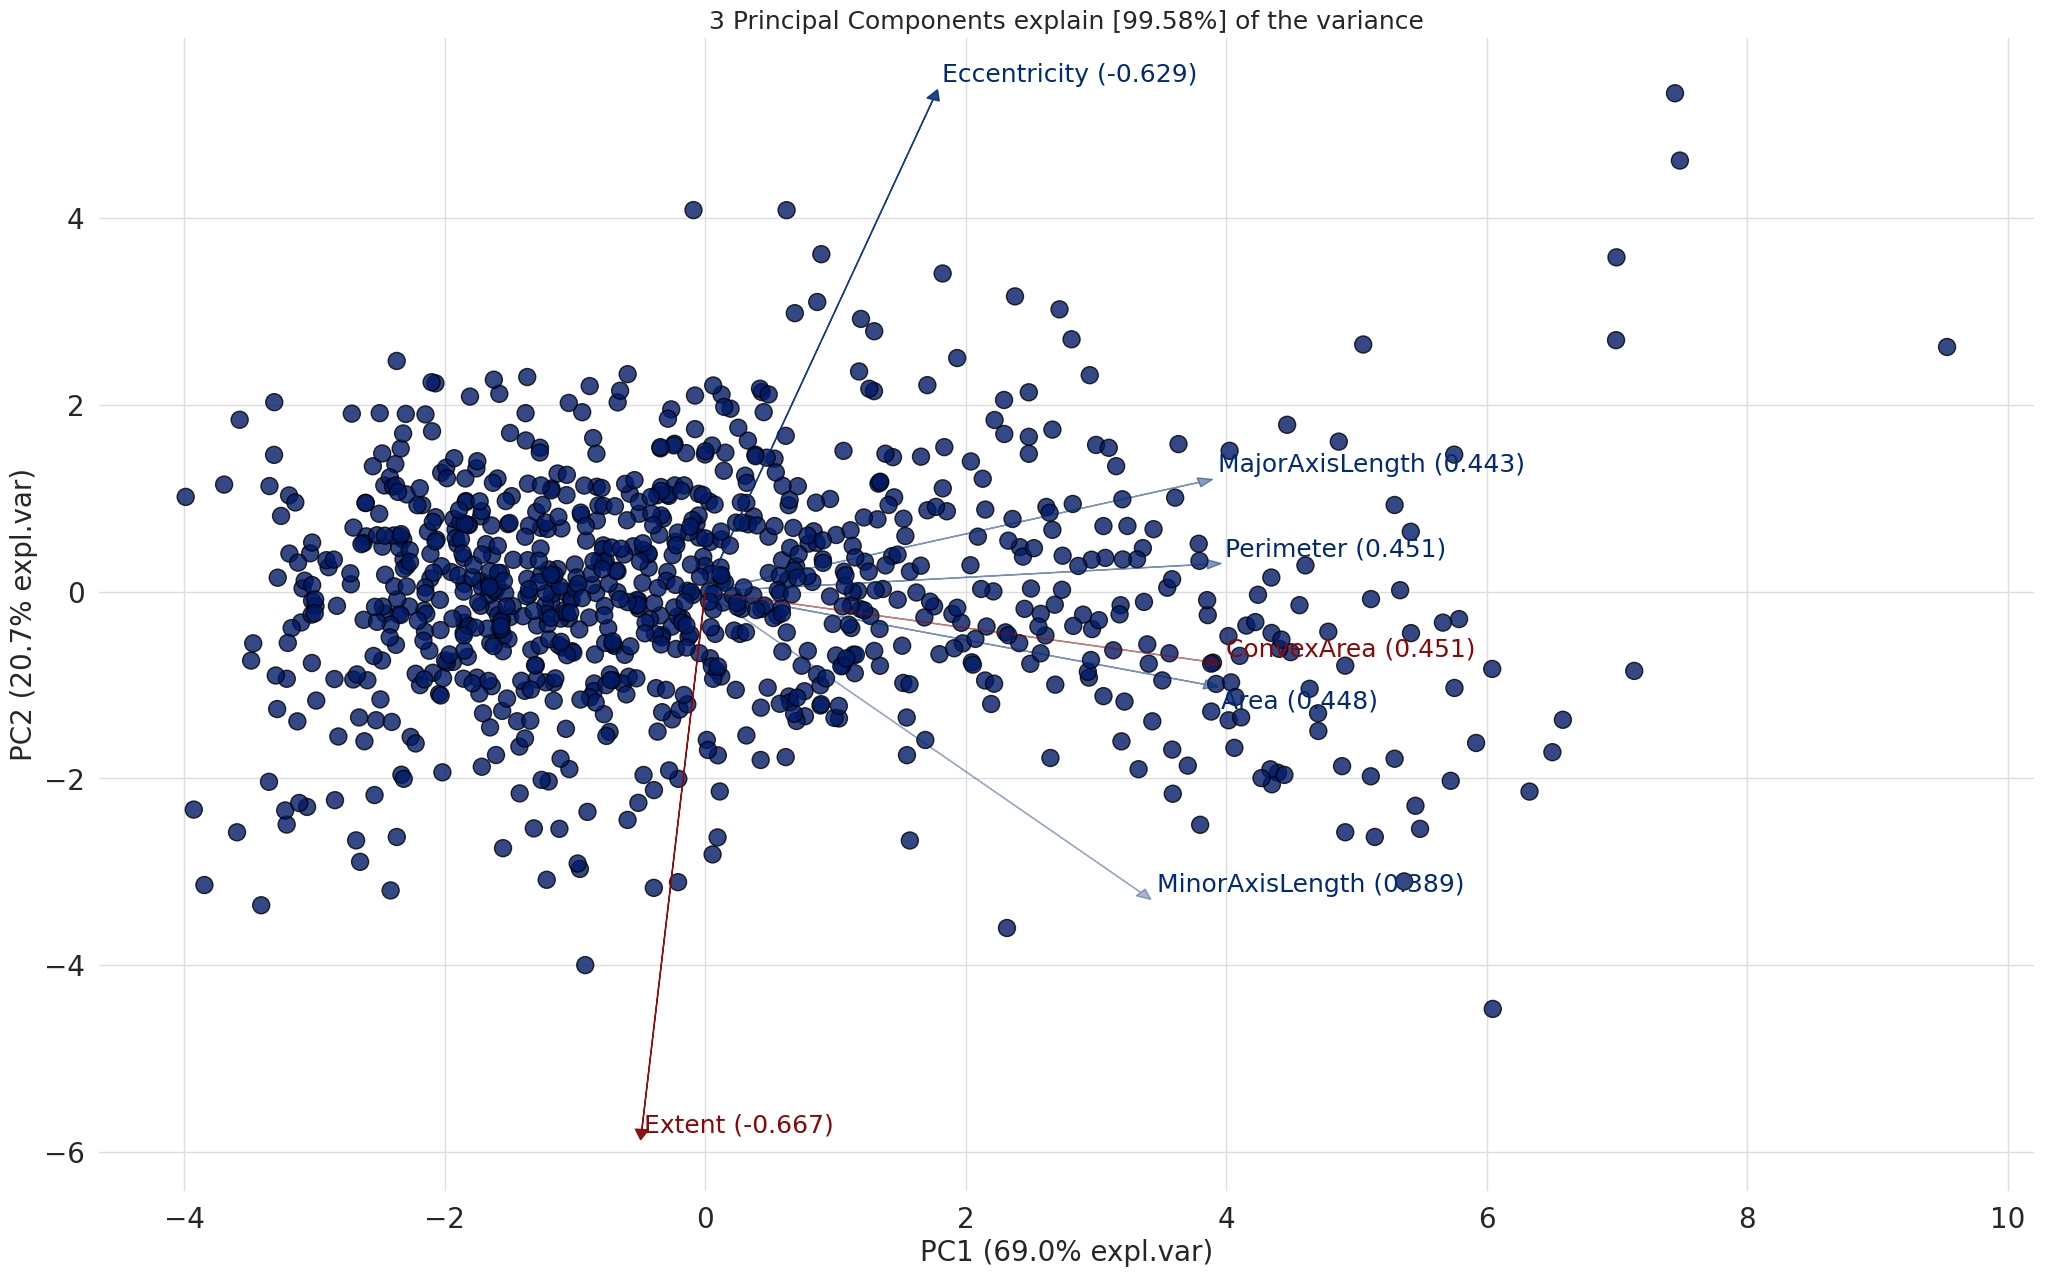

In [145]:
model.biplot(cmap='RdYlGn_r', label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

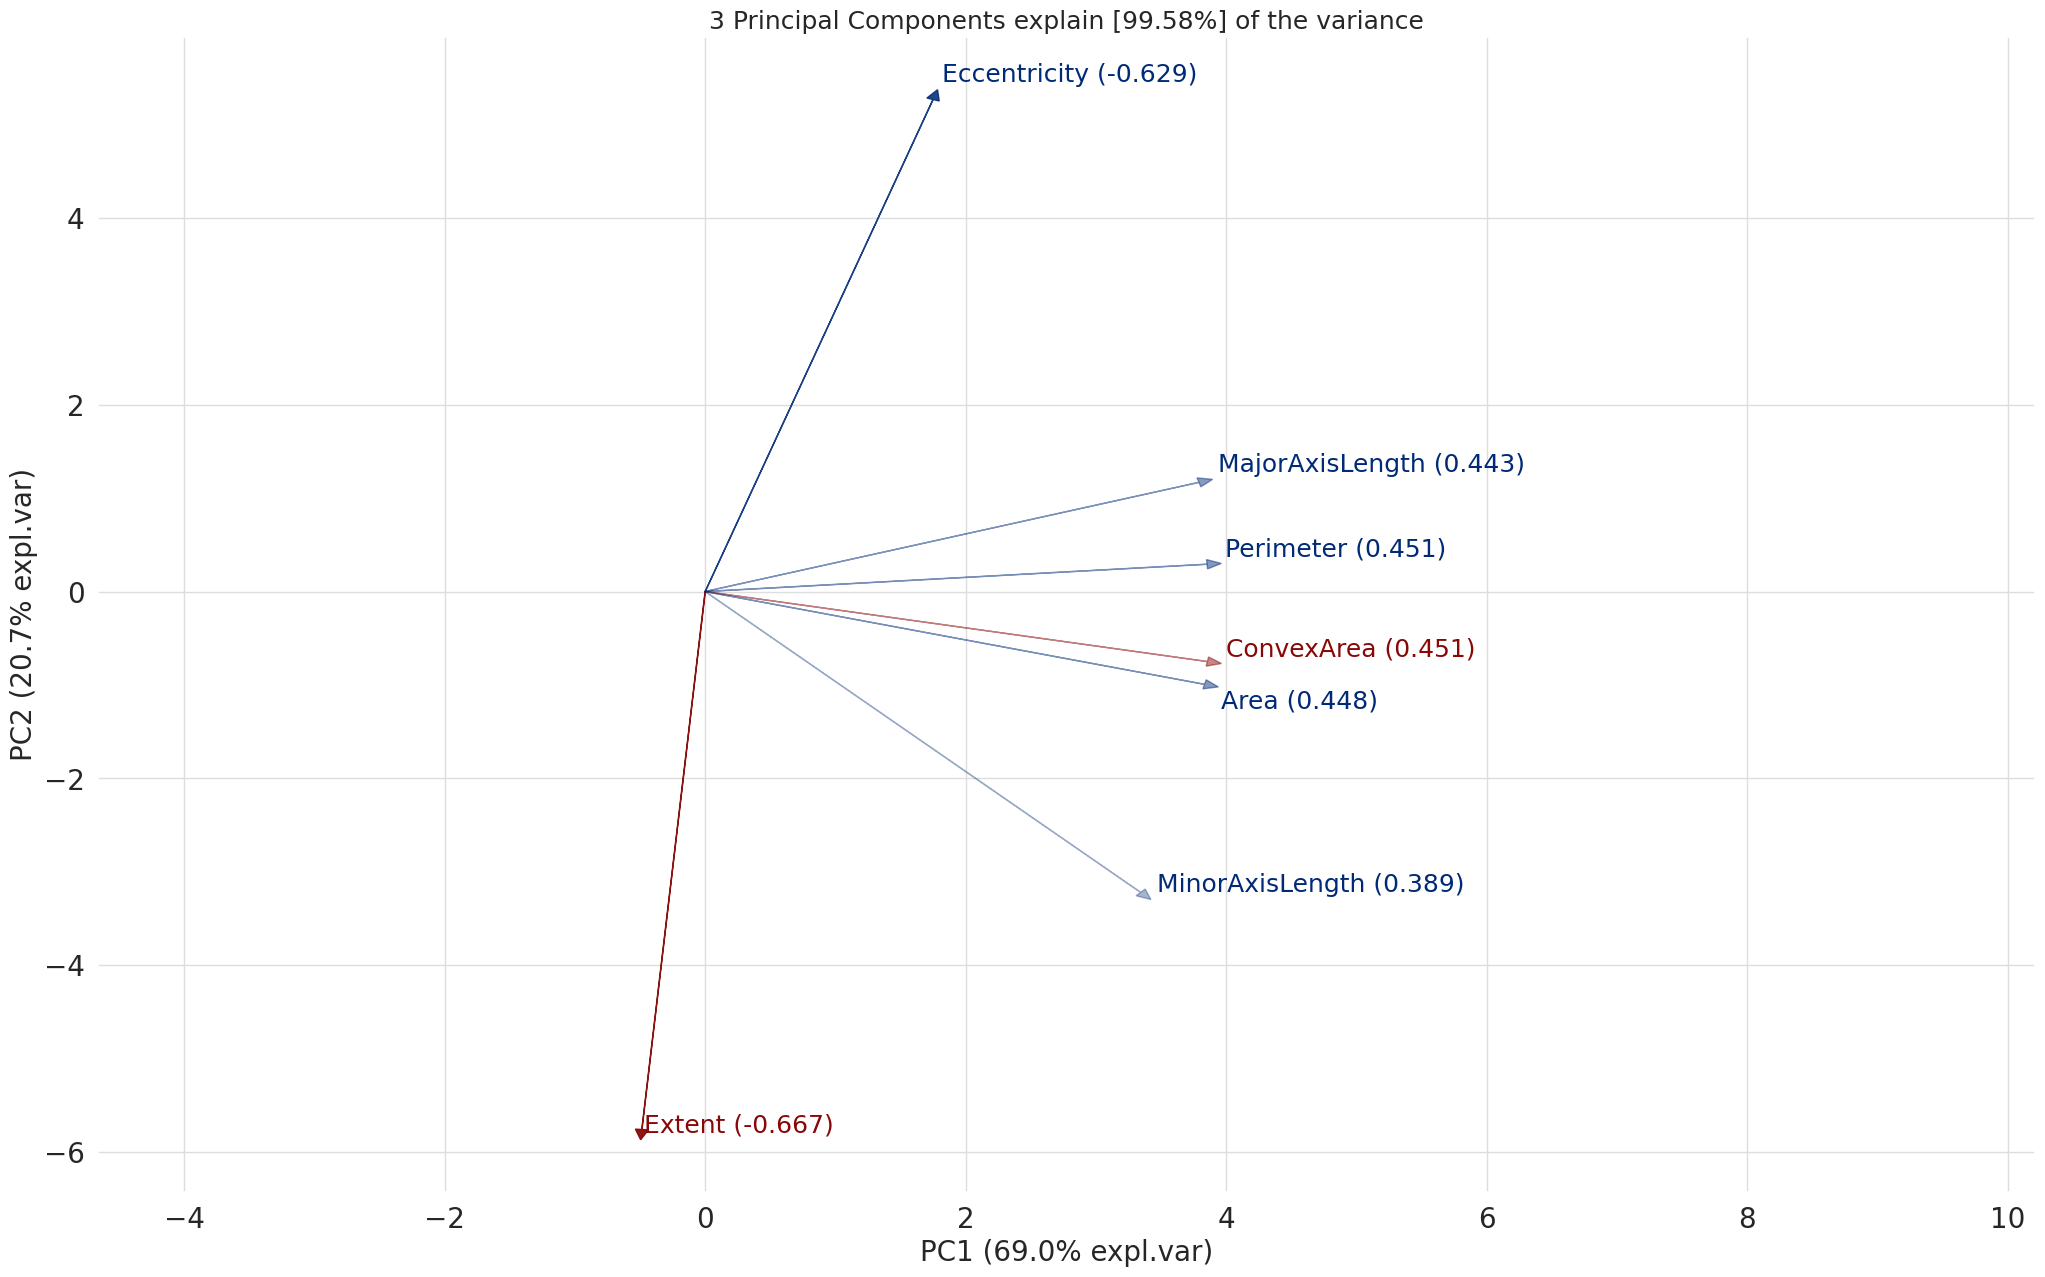

In [147]:
model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)', zlabel='PC3 (8.97% expl.var)'>)

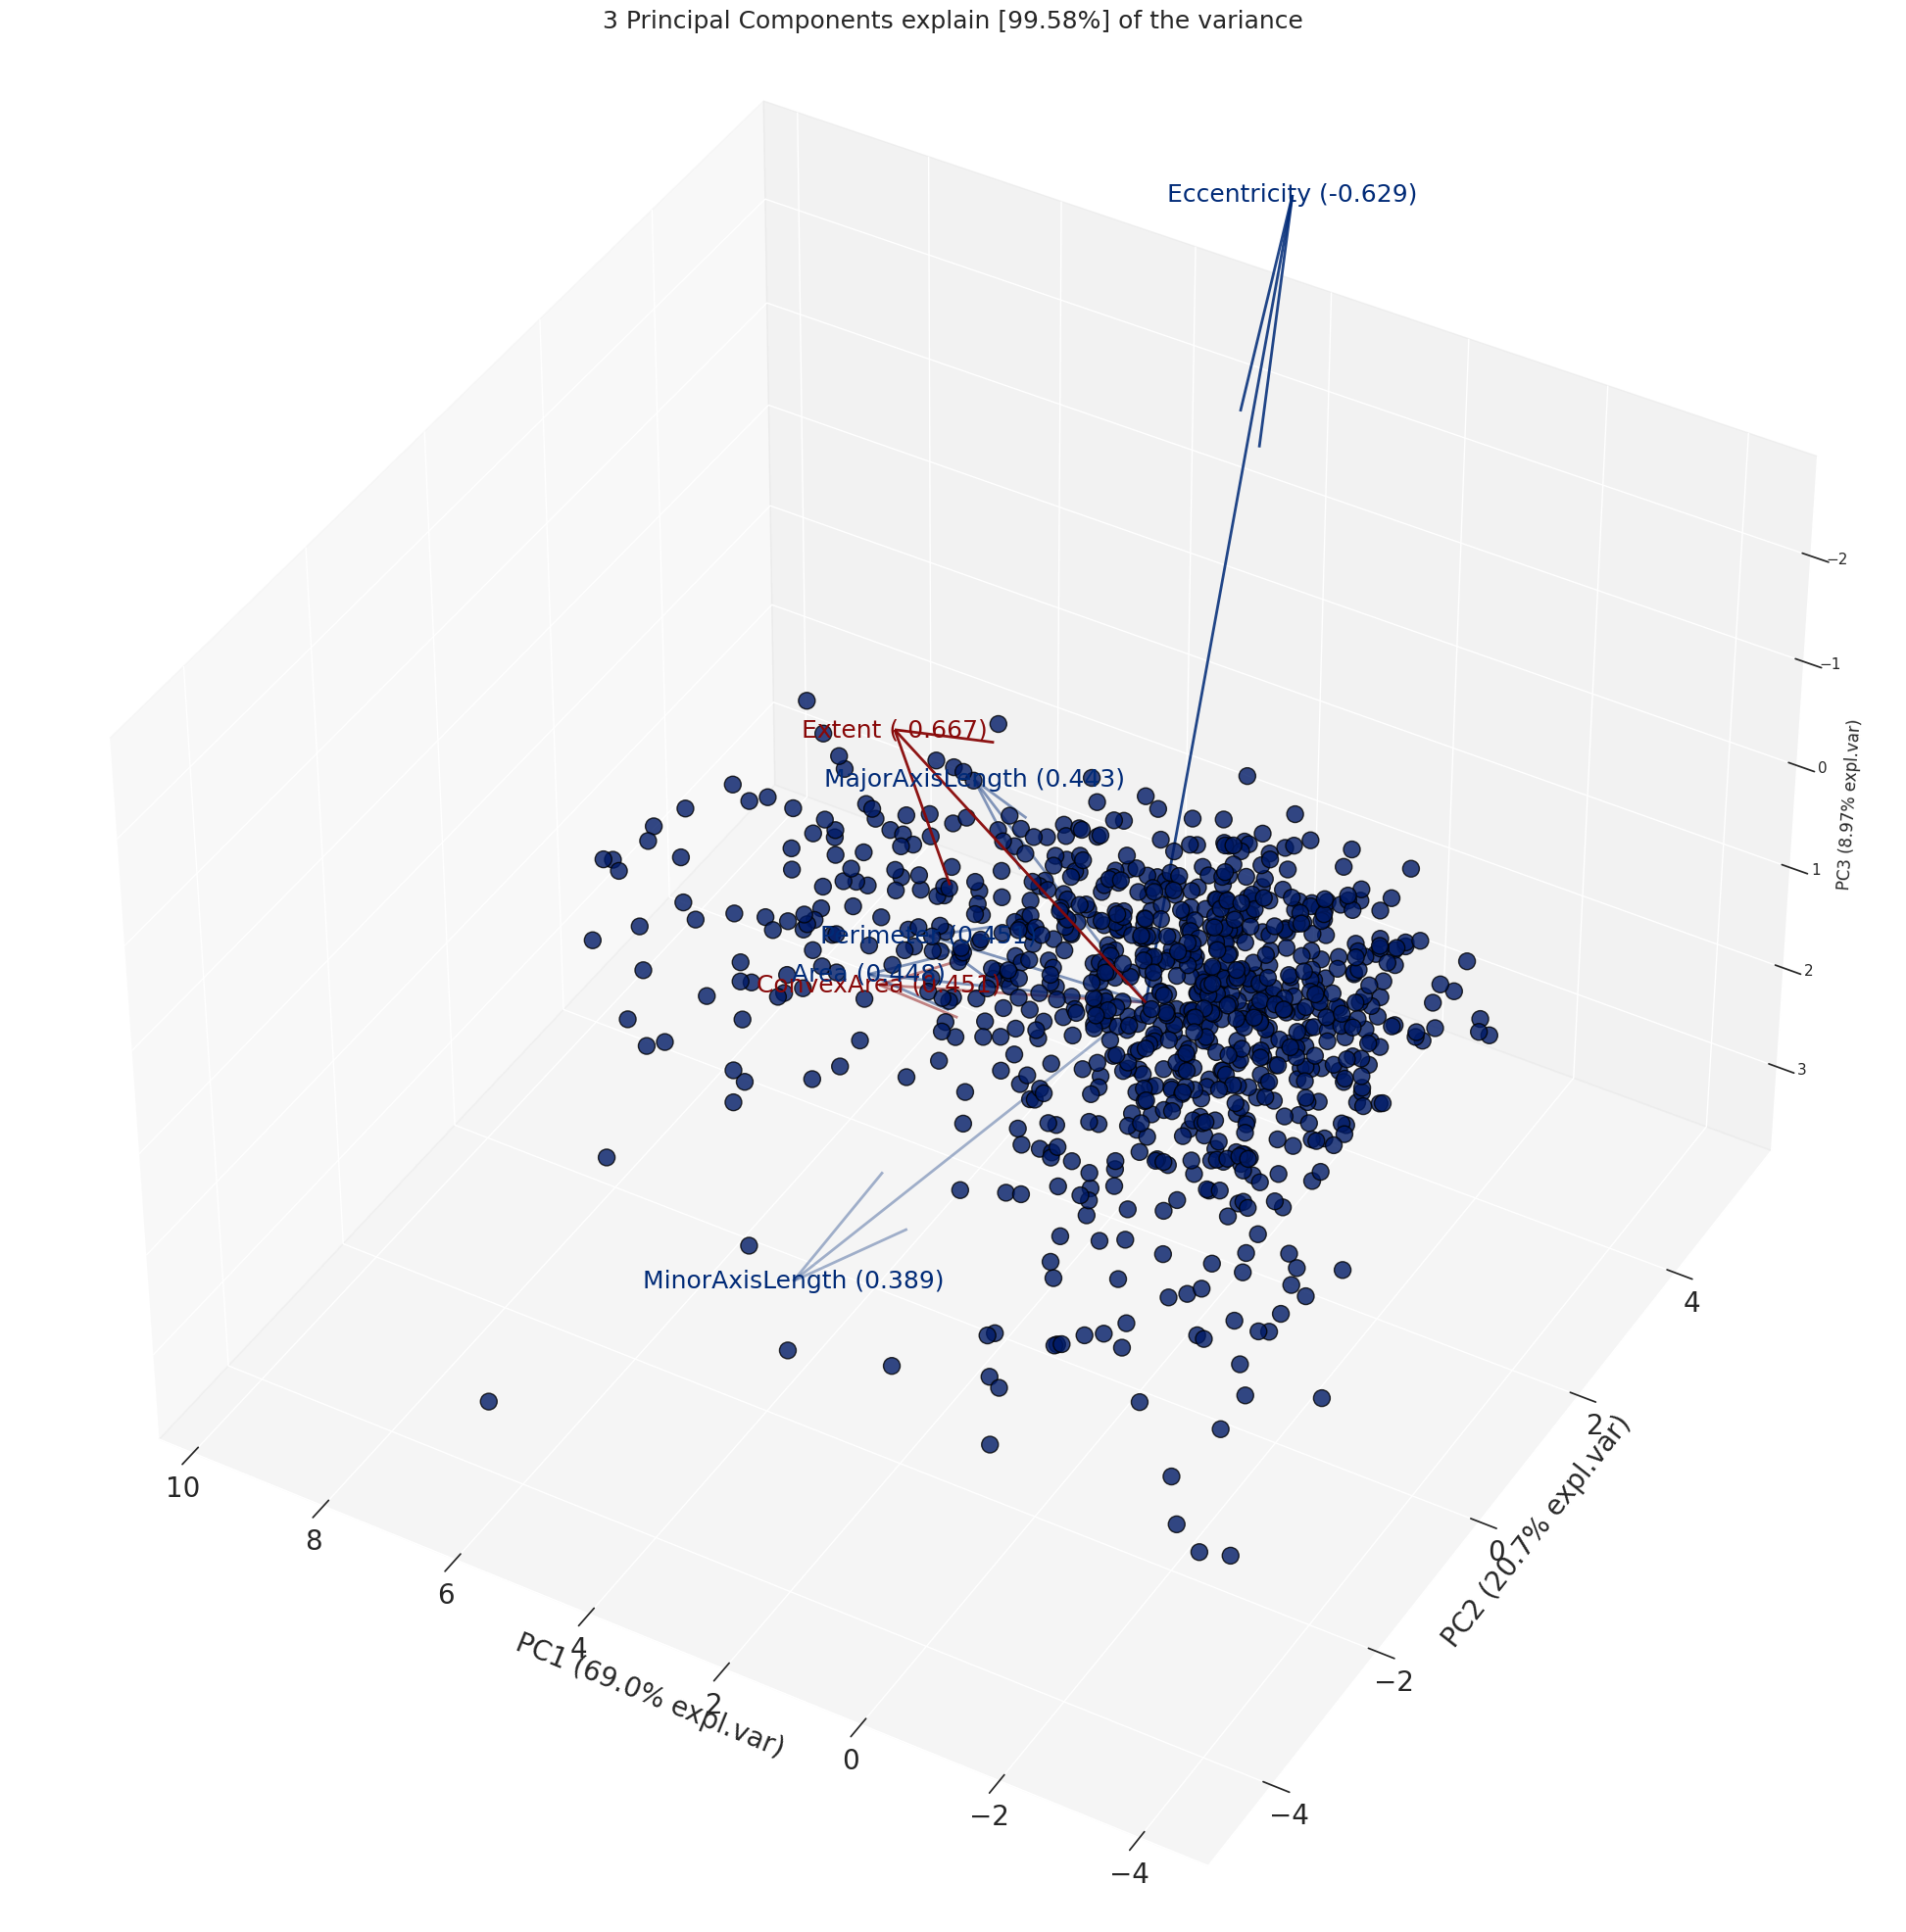

In [149]:
model.biplot3d(legend=False)

### **Principal components**

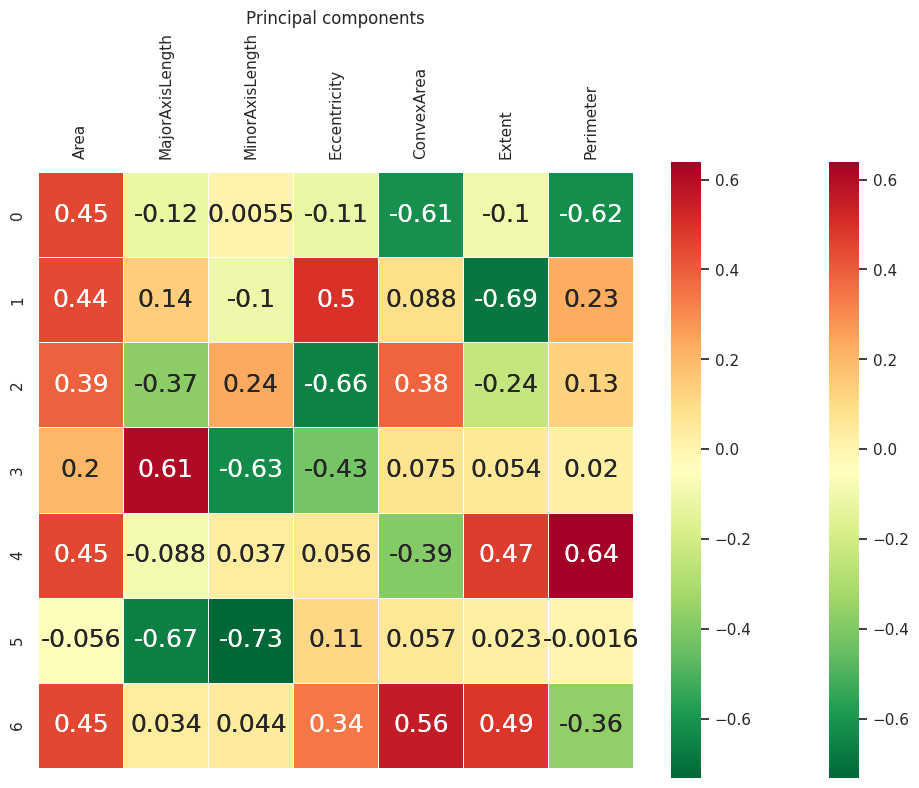

PC1:[ 0.44828422  0.4432398   0.38938118  0.20297098  0.45093833 -0.05636836
  0.45082374]
PC2:[-0.11609991  0.13658724 -0.37492246  0.61082321 -0.08761633 -0.66734439
  0.03417227]


In [151]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax = sns.heatmap(comps, cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')


### **Hotelling's T2 test**

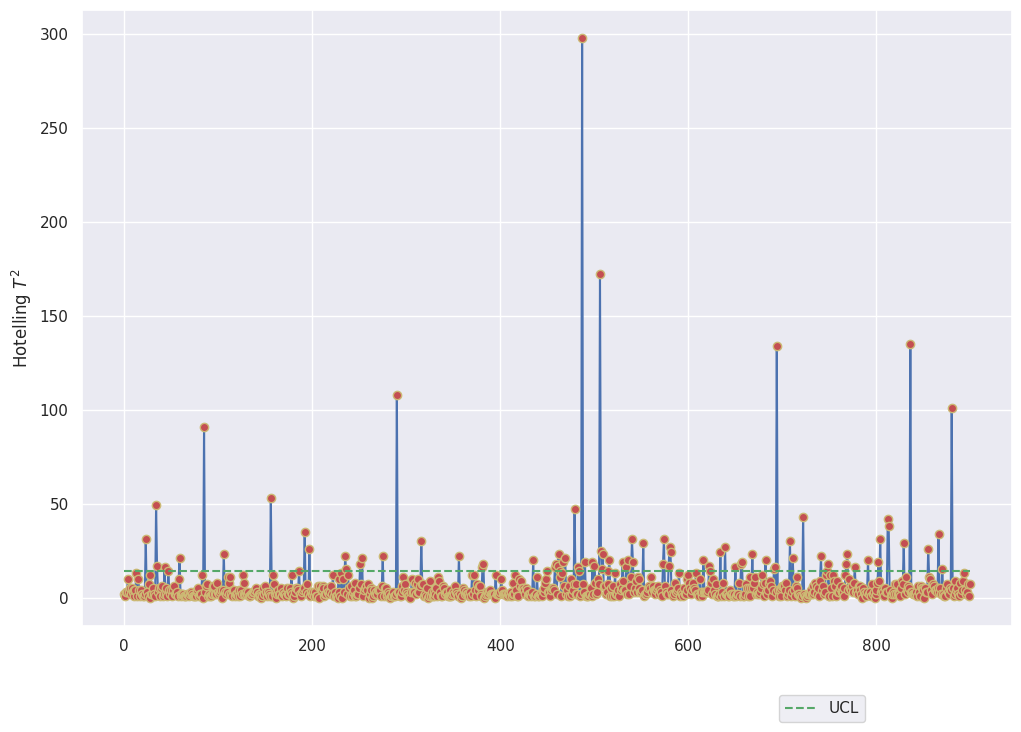

In [153]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [ ]:
print(np.argwhere(Tsquare>UCL))

### **Control Charts for Principal Components**

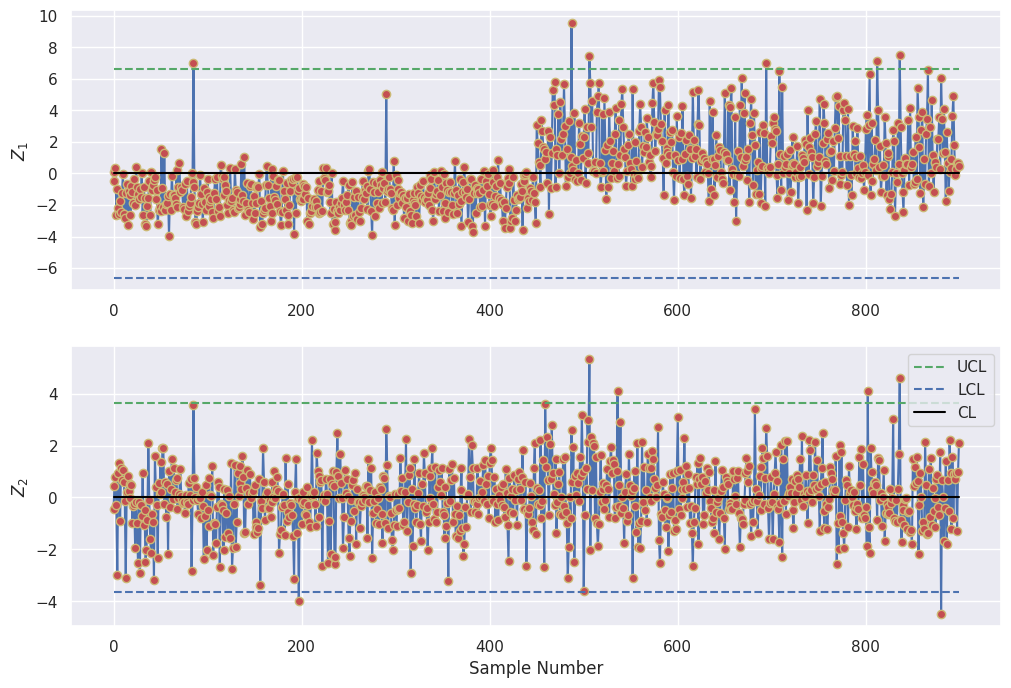

In [155]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [157]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[ 85]
 [487]
 [506]
 [694]
 [812]
 [836]]
[[197]
 [880]]
[[506]
 [536]
 [802]
 [836]]


In [179]:
#For Google Colab only
# from pycaret.utils import enable_colab 
enable_colab()
     

NameError: name 'enable_colab' is not defined

In [181]:

data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (810, 7)
Unseen Data For Predictions: (90, 7)


In [183]:

from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

ModuleNotFoundError: No module named 'pycaret'

## **Multi-Class Classification**

In [ ]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, X, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, X, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], Y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

### Gaussian Naive Bayes (GNB)

In [ ]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
# Assuming you have your features in X_train and labels in y_train
# If your variable names are different, replace X_train and y_train accordingly
X_train, X_test, y_train, y_test = train_test_split(your_features, your_labels, test_size=0.2, random_state=42)

knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict = {}
for i in ['fit_time', 'test_f1_macro']:
    knn_scores_dict["knn_full_data " + i] = scores_knn_full_data[i]
    knn_scores_dict["knn_Z  " + i] = scores_knn_Z[i]
    knn_scores_dict["knn_Z12 " + i] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test),
            ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
    knn.fit(Xtr, ytr)
    y_pred = knn.predict(Xtst)
    knn_score = knn.score(Xtst, ytst)
  
    print(f'DATASET: {name}')
    print('Classification Report:')
    print(classification_report(ytst, y_pred, digits=3))

    cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
    ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
    plt.yticks(rotation=0)
    ax.tick_params(labelbottom=False, labeltop=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    if name == 'Z12':
        x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
        y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
        plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
        plt.xlabel('$Z_1$')
        plt.ylabel('$Z_2$')
        plt.legend()
        plt.show()


### Decision Trees (DT)

## **ROC Curves**

## **Bar Chart Plot**